In [1]:
import pandas as pd
import numpy as np
import puffin.tardis_importer as ti
import math
import puffin.market_data as md
import puffin.tools as tools
import datetime
import matplotlib.pyplot as plt

In [2]:
ftx = pd.read_parquet('C:/Users/Tibor/Data/ftx_refdb1.parquet')
ftx['ExchangePairCode']

0      AAVE-PERP
1       BCH-PERP
2       BNB-PERP
3       BTC-PERP
4      DOGE-PERP
5       ETH-PERP
6        HT-PERP
7       KNC-PERP
8      LINK-PERP
9       LTC-PERP
10    MATIC-PERP
11      MKR-PERP
12      OKB-PERP
13      OMG-PERP
14     TOMO-PERP
15      TRX-PERP
16      UNI-PERP
17     USDT-PERP
18      XRP-PERP
19      YFI-PERP
20      GRT-PERP
21     RUNE-PERP
22      SNX-PERP
23      SOL-PERP
24    SUSHI-PERP
25      SXP-PERP
26    1INCH-PERP
27    ALPHA-PERP
28     BAND-PERP
29      CEL-PERP
Name: ExchangePairCode, dtype: object

In [3]:
symbol = 'SNX'
date = '2021-10-28'
end_date = date[:-2] + f"{int(date[-2:]) + 1:02}" #set the end date to 1 day after

batch download the data from the tardis api client

In [4]:
ti.batch_download(exchange='ftx', symbol_list=[f'{symbol}/USD', f'{symbol}-PERP'], start_date=date, end_date = end_date, data_types =['quotes', 'trades'])

Turn the trades/tob date for that day into parquet files

In [5]:
instrument_id = tools.get_id_from_symbol(f'{symbol}/USD')
stripped_date = date.replace('-','')
trades = ti.generate_trade_data_from_gzip(f'{symbol}/USD', f'./datasets/ftx_trades_{date}_{symbol}-USD.csv.gz')
tob = ti.generate_tob_data_from_gzip(f'{symbol}/USD', f'./datasets/ftx_quotes_{date}_{symbol}-USD.csv.gz')
trades.to_parquet(f'./datasets/{stripped_date}_{instrument_id}_trade.parquet', index=False)
tob.to_parquet(f'./datasets/{stripped_date}_{instrument_id}_tob.parquet', index=False)

instrument_id2 = tools.get_id_from_symbol(f'{symbol}-PERP')
trades_perp = ti.generate_trade_data_from_gzip(f'{symbol}-PERP', f'./datasets/ftx_trades_{date}_{symbol}-PERP.csv.gz')
tob_perp = ti.generate_tob_data_from_gzip(f'{symbol}-PERP', f'./datasets/ftx_quotes_{date}_{symbol}-PERP.csv.gz')
trades_perp.to_parquet(f'./datasets/{stripped_date}_{instrument_id2}_trade.parquet', index=False)
tob_perp.to_parquet(f'./datasets/{stripped_date}_{instrument_id2}_tob.parquet', index=False)

In [6]:
tob

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,bid_price,bid_qty,ask_price,ask_qty
0,58712,1635379201123894000,1635379201112815000,9.2605,520.7,9.2805,425.6
1,58712,1635379201332705000,1635379201320922000,9.2610,323.7,9.2805,425.6
2,58712,1635379201443686000,1635379201430171000,9.2610,323.7,9.2805,649.7
3,58712,1635379203922380000,1635379203910435000,9.2605,510.0,9.2805,649.7
4,58712,1635379204137350000,1635379204129932000,9.2610,10.7,9.2805,649.7
...,...,...,...,...,...,...,...
61372,58712,1635465599294231000,1635465599273280000,9.7135,11.7,9.7445,207.2
61373,58712,1635465599348131000,1635465599339755000,9.7135,11.7,9.7440,128.2
61374,58712,1635465599551375000,1635465599538715000,9.7135,10.6,9.7440,128.2
61375,58712,1635465599646263000,1635465599634566000,9.7135,10.4,9.7435,207.2


In [7]:
trades

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,price,qty,buyer_is_market_maker,trade_id
0,58712,1635379219929464000,1635379219684983000,9.2790,7.5,False,2254294641
1,58712,1635379220660251000,1635379220573082000,9.2860,22.9,False,2254294987
2,58712,1635379220660251000,1635379220573082000,9.2860,10.7,False,2254294988
3,58712,1635379221167932000,1635379220919736000,9.2870,2.0,False,2254295179
4,58712,1635379238057015000,1635379237992291000,9.3010,2.0,False,2254299207
...,...,...,...,...,...,...,...
6592,58712,1635465598106272000,1635465598078223000,9.7165,1.0,True,2268062626
6593,58712,1635465599294221000,1635465599253909000,9.7300,2.4,True,2268063051
6594,58712,1635465599551275000,1635465599533405000,9.7135,1.1,True,2268063293
6595,58712,1635465599646259000,1635465599629312000,9.7135,0.2,True,2268063369


In [8]:
tob_perp

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,bid_price,bid_qty,ask_price,ask_qty
0,58870,1635379200607680000,1635379200574230000,9.2595,64.0,9.2755,52.7
1,58870,1635379200651197000,1635379200636633000,9.2620,64.0,9.2755,52.7
2,58870,1635379203001633000,1635379202921898000,9.2625,25.0,9.2755,52.7
3,58870,1635379203045144000,1635379203021150000,9.2630,64.0,9.2755,52.7
4,58870,1635379204384692000,1635379204373462000,9.2630,64.0,9.2755,26.4
...,...,...,...,...,...,...,...
160445,58870,1635465599644909000,1635465599612187000,9.7000,216.5,9.7090,49.5
160446,58870,1635465599684987000,1635465599668411000,9.7000,216.5,9.7095,883.0
160447,58870,1635465599731083000,1635465599714592000,9.7000,216.5,9.7095,880.6
160448,58870,1635465599819922000,1635465599804073000,9.7005,49.5,9.7090,49.5


In [9]:
trades_perp

,instrument_id,receive_timestamp_nanos,exchange_timestamp_nanos,price,qty,buyer_is_market_maker,trade_id
0,58870,1635379211923752000,1635379211872682000,9.2660,15.4,True,2254290886
1,58870,1635379212972758000,1635379212861076000,9.2755,26.4,False,2254291196
2,58870,1635379217685597000,1635379217635080000,9.2740,10.5,False,2254293398
3,58870,1635379219754752000,1635379219691087000,9.2800,162.0,False,2254294531
4,58870,1635379220090708000,1635379219932009000,9.2805,26.4,False,2254294746
...,...,...,...,...,...,...,...
32798,58870,1635465599416493000,1635465599379807000,9.7095,0.2,False,2268063238
32799,58870,1635465599416493000,1635465599380094000,9.7095,2.4,False,2268063239
32800,58870,1635465599491117000,1635465599463405000,9.7055,96.4,True,2268063280
32801,58870,1635465599731076000,1635465599692585000,9.7095,2.4,False,2268063444


Generate 1 second vwaps from the raw trade data

In [10]:
mrk = md.MarketData(f'{symbol}/USD')
date_tuple = datetime.datetime(int(stripped_date[0:4]), int(stripped_date[4:6]), int(stripped_date[6:8]))
mrk.load_top_of_book_data_from_parquet(date_tuple)
mrk.load_trade_data_from_parquet(date_tuple)
mrk.generate_formatted_top_of_book_data()
mrk.generate_formatted_trades_data()

In [11]:
df1 = mrk.get_time_bars(1000)
df1['time'] = df1['timestamp_millis'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df1['vwap'] = df1['vwap']*tools.get_tick_size_from_symbol(f'{symbol}/USD')
df1

,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,time
0,1635379220000,1.635379e+12,1.635379e+12,9.2860,18572,18574,18574,18572,354,0,2021-10-28 01:00:20
17,1635379237000,1.635379e+12,1.635379e+12,9.3010,18602,18604,18604,18602,30,0,2021-10-28 01:00:37
22,1635379242000,1.635379e+12,1.635379e+12,9.2925,18585,18585,18585,18585,120,0,2021-10-28 01:00:42
62,1635379282000,1.635379e+12,1.635379e+12,9.2870,18574,18574,18574,18574,20,20,2021-10-28 01:01:22
85,1635379305000,1.635379e+12,1.635379e+12,9.2940,18588,18588,18588,18588,180,0,2021-10-28 01:01:45
...,...,...,...,...,...,...,...,...,...,...,...
86371,1635465591000,1.635466e+12,1.635466e+12,9.7415,19469,19515,19515,19469,575,0,2021-10-29 00:59:51
86372,1635465592000,1.635466e+12,1.635466e+12,9.7600,19517,19527,19527,19517,98,0,2021-10-29 00:59:52
86375,1635465595000,1.635466e+12,1.635466e+12,9.7505,19501,19501,19501,19501,442,0,2021-10-29 00:59:55
86376,1635465596000,1.635466e+12,1.635466e+12,9.7305,19472,19456,19472,19456,157,157,2021-10-29 00:59:56


In [12]:
mrk2 = md.MarketData(f'{symbol}-PERP')
date_tuple = datetime.datetime(int(stripped_date[0:4]), int(stripped_date[4:6]), int(stripped_date[6:8]))
mrk2.load_top_of_book_data_from_parquet(date_tuple)
mrk2.load_trade_data_from_parquet(date_tuple)
mrk2.generate_formatted_top_of_book_data()
mrk2.generate_formatted_trades_data()

In [13]:
df2 = mrk2.get_time_bars(1000)

In [14]:
df2['time'] = df2['timestamp_millis'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df2['vwap'] = df2['vwap']*tools.get_tick_size_from_symbol(f'{symbol}-PERP')
df2

,timestamp_millis,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,time
0,1635379212000,1.635379e+12,1.635379e+12,9.2750,18550,18550,18550,18550,263,0,2021-10-28 01:00:12
5,1635379217000,1.635379e+12,1.635379e+12,9.2735,18547,18547,18547,18547,105,0,2021-10-28 01:00:17
7,1635379219000,1.635379e+12,1.635379e+12,9.2800,18560,18561,18561,18560,1883,0,2021-10-28 01:00:19
8,1635379220000,1.635379e+12,1.635379e+12,9.2875,18571,18578,18578,18571,1466,0,2021-10-28 01:00:20
9,1635379221000,1.635379e+12,1.635379e+12,9.2895,18578,18581,18581,18578,691,0,2021-10-28 01:00:21
...,...,...,...,...,...,...,...,...,...,...,...
86380,1635465592000,1.635466e+12,1.635466e+12,9.7730,19537,19550,19550,19537,1156,165,2021-10-29 00:59:52
86383,1635465595000,1.635466e+12,1.635466e+12,9.7690,19538,19538,19538,19538,1620,1620,2021-10-29 00:59:55
86384,1635465596000,1.635466e+12,1.635466e+12,9.7325,19486,19440,19486,19437,17369,12304,2021-10-29 00:59:56
86385,1635465597000,1.635466e+12,1.635466e+12,9.7140,19441,19438,19453,19416,14027,10246,2021-10-29 00:59:57


Merge the spot and perp dataframes and drop the the row's with NA (because the data for one is missing). I tried forward filling instead (see cell below), but the forward fill is messy. Generate the plot with the forward fill to see why.

In [15]:
df3 = pd.merge(df1,df2, how='outer', on='time', suffixes = ['_spot', '_perp'])
#df3_clean = df3.fillna(method='ffill')
df3_clean = df3.dropna(subset=['vwap_spot', 'vwap_perp'])

df3_clean['premium'] = (df3_clean['vwap_perp'] - df3_clean['vwap_spot'])/df3_clean['vwap_spot']

C:\Users\Tibor\AppData\Local\Temp/ipykernel_25520/3270660883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_clean['premium'] = (df3_clean['vwap_perp'] - df3_clean['vwap_spot'])/df3_clean['vwap_spot']


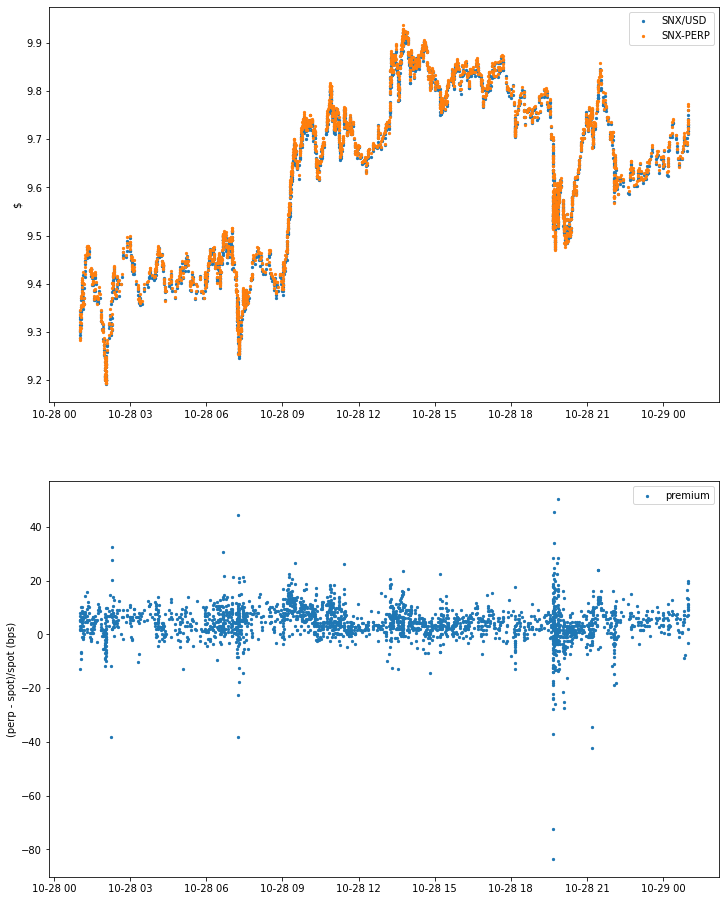

In [16]:
fig, axs = plt.subplots(2,1, figsize=(12,16))
ax1 = axs[0]
ax2 = axs[1]
ax1.scatter(df3_clean['time'], df3_clean['vwap_spot'], s=5, label = f'{symbol}/USD')
ax1.scatter(df3_clean['time'], df3_clean['vwap_perp'], s=5, label = f'{symbol}-PERP')
ax1.set_ylabel('$')
ax1.legend()


ax2.scatter(df3_clean['time'], 1e4*df3_clean['premium'], s=5, label='premium')
ax2.set_ylabel('(perp - spot)/spot (bps)')
ax2.legend()
plt.show()

In [17]:
spread_std = 1e4*np.std(df3_clean['premium'])
spread_mean = 1e4*np.mean(df3_clean['premium'])
print('mean of spread (bps): ', spread_mean, ", std of spread (bps): ", spread_std)

mean of spread (bps):  4.439170752525614 , std of spread (bps):  6.863442289896912


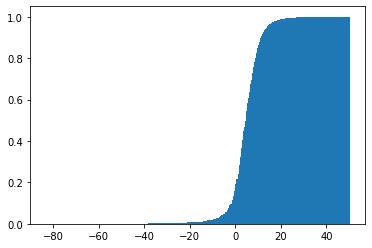

In [18]:
x = plt.hist(1e4*df3_clean['premium'], 1000, cumulative=True, density=True)
plt.show()

In [19]:
np.quantile(1e4*df3_clean['premium'], .5)

4.55950149450344

In [21]:
np.quantile(1e4*df3_clean['premium'], .75)

7.949546875828379